In [1]:
import sys,os 
sys.path.append('../../../')
sys.path.append('../../')
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

from   matplotlib import animation
import matplotlib.image as mpimg 
import matplotlib.lines as mlines
from   IPython.display import HTML
import matplotlib as mpl 

from utils.vis_utils import *


#mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
from pylab import cm
colors = cm.get_cmap('tab10', 10)

POS_COLOR = colors(4)
NEG_COLOR = colors(0)
UNLBL_COLOR = cm.get_cmap('gray',200)(150)




def vis_one_epoch_tbal(ax,tbal_out,r=1):
    per_epoch_out =tbal_out['lst_epoch_out']
    dm = tbal_out['dm']

    epoch = len(per_epoch_out)-1
    
    X = dm.ds.X
    Y = dm.ds.Y 
    
    print(len(Y))
    epoch_out = per_epoch_out[epoch]
    
    x_min,x_max = min(X[:,0])-0.5, max(X[:,0]) + 0.5
    y_min, y_max = min(X[:,1]) -0.5, max(X[:,1]) +0.5

        

    all_train_pts_idcs_till_epoch =[]
    all_train_pts_lbls_till_epoch =[]

    for e in range(epoch):
        all_train_pts_idcs_till_epoch.extend(per_epoch_out[e]['query_points'])
        all_train_pts_lbls_till_epoch.extend(per_epoch_out[e]['true_labels'])
    
    prev_qp, prev_qn = split_pos_neg_pts(all_train_pts_idcs_till_epoch,all_train_pts_lbls_till_epoch)

    k = int(r*len(prev_qp))
    prev_qp = np.random.choice(prev_qp,k,replace=False)  
    k = int(r*len(prev_qn))
    prev_qn = np.random.choice(prev_qn,k,replace=False) 

    l1 = ax.scatter(X[prev_qp,0],X[prev_qp,1],s=10,color='blue',label='Queried +ve point',marker='s')
    l2 = ax.scatter(X[prev_qn,0],X[prev_qn,1],s=10,color='red',label='Queried -ve point',marker='s')
    
    
    # show unlabeled pts in gray
    if(epoch<len(per_epoch_out)-1):
        unlabeled_pts = np.array(per_epoch_out[epoch+1]['unlabeled_pts_idcs'])
        X_u = X[unlabeled_pts]
        k = 100
        ax.scatter(X_u[:,0][:k],X_u[:,1][:k],marker='.',color='gray', s=4.0 ,label='unlabeled ')
    

    show_auto_lbld = True
    if(show_auto_lbld):
        auto_lbleled_pts_till_now = []         
        for e in range(epoch+1):
            if('auto_lbld_idx_lbl' in per_epoch_out[e] ):
                auto_lbleled_pts_till_now.extend(per_epoch_out[e]['auto_lbld_idx_lbl'])

        auto_lbl_idx = [x['idx'] for x in auto_lbleled_pts_till_now]
        auto_lbl_Y   = [x['label'] for x in auto_lbleled_pts_till_now]
        num_auto = len(auto_lbl_Y)
        auto_lbld_pos = [ auto_lbl_idx[i] for i in range(num_auto) if int(auto_lbl_Y[i]) ==1 ]
        auto_lbld_neg = [ auto_lbl_idx[i] for i in range(num_auto) if int(auto_lbl_Y[i]) ==0 ]

        k1 = int(r*len(auto_lbld_pos))
        k2 = int(r*len(auto_lbld_neg))
        print(k1,k2)
        if(k1>0):
            auto_lbld_pos = np.random.choice(auto_lbld_pos,k1,replace=False) 
            l3 = ax.scatter(X[auto_lbld_pos,0],X[auto_lbld_pos,1],s=4.0, marker='.',label='auto-labeled +ve')
        if(k2>0):
            auto_lbld_neg = np.random.choice(auto_lbld_neg,k2,replace=False) 
            l4 = ax.scatter(X[auto_lbld_neg,0],X[auto_lbld_neg,1], s= 4.0, marker='.', label='auto-labeled -ve')
        
    ax.set_xticks([])
    ax.set_yticks([])
    
    return [l1,l2,l3,l4]

/tmp/ipykernel_97572/1636727780.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', 10)
/tmp/ipykernel_97572/1636727780.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  UNLBL_COLOR = cm.get_cmap('gray',200)(150)


In [2]:
def act_learn_out_vis(ax,act_lrn_out,r):

    per_epoch_out = act_lrn_out['lst_epoch_out']
    dm = act_lrn_out['dm']
    meta_df = dm.meta_df
    epoch = len(per_epoch_out)-1

    auto_lbld_idcs =meta_df.query('is_auto_labeled==True')['idx'].tolist()
    X = dm.ds.X
    Y = dm.ds.Y
    
    all_train_pts_idcs_till_epoch =[]
    all_train_pts_lbls_till_epoch =[]
    
    for e in range(epoch):
        all_train_pts_idcs_till_epoch.extend(per_epoch_out[e]['query_points'])
        all_train_pts_lbls_till_epoch.extend(per_epoch_out[e]['true_labels'])
    
    qp, qn = split_pos_neg_pts(all_train_pts_idcs_till_epoch,all_train_pts_lbls_till_epoch)


    k = int(r*len(qp))
    qp = np.random.choice(qp,k,replace=False)  
    k = int(r*len(qn))
    qn = np.random.choice(qn,k,replace=False) 

    l1 = ax.scatter(X[qp,0],X[qp,1],s=10.0,marker='s',color='blue')
    l2 = ax.scatter(X[qn,0],X[qn,1],s=10.0,marker='s',color='red')
    
    # show unlabeled pts in gray
    unlabeled_pts = meta_df.query("is_labeled==False")['idx'].tolist()

    unlabeled_pts = np.array(unlabeled_pts)

    X_u = X[unlabeled_pts]
    q = np.arange(len(X_u))
    k = int(r*len(X_u))
    q = np.random.choice(q,k,replace=False) 

    l3 = ax.scatter(X_u[q,0],X_u[q,1],marker='.',color='gray', s=3.0 ,label='unlabeled', alpha=0.6)

    show_auto_lbld = True
    if(show_auto_lbld):

        auto_lbld_pos = meta_df.query('is_auto_labeled==True & true_label==1')['idx'].tolist()
        auto_lbld_neg = meta_df.query('is_auto_labeled==True & true_label==0')['idx'].tolist()

        k1 = int(r*len(auto_lbld_pos))
        k2 = int(r*len(auto_lbld_neg))
        print(k1,k2)
        if(k1>0):
            auto_lbld_pos = np.random.choice(auto_lbld_pos,k1,replace=False) 
        
        l4 = ax.scatter(X[auto_lbld_pos,0],X[auto_lbld_pos,1],s=4.0,
            marker='.',label='auto-labeled +ve')
        if(k2>0):
            auto_lbld_neg = np.random.choice(auto_lbld_neg,k2,replace=False) 
            l5 = ax.scatter(X[auto_lbld_neg,0],X[auto_lbld_neg,1], s= 4.0,
            marker='.', label='auto-labeled -ve')


    ax.set_xticks([])
    ax.set_yticks([])
    return [l1,l2,l3,l4,l5]


In [3]:
import pickle 

out_dir = '../../outputs/circles/vis/'

act_lbl_out = {}

with open(f'{out_dir}/act_lbl_vis_out.pkl', 'rb') as handle:
    act_lbl_out  = pickle.load(handle)
    
act_lrn_out = {}
with open(f'{out_dir}/act_lrn_vis_out.pkl', 'rb') as handle:
    act_lrn_out  = pickle.load(handle)

10000
2248 2336
1 646


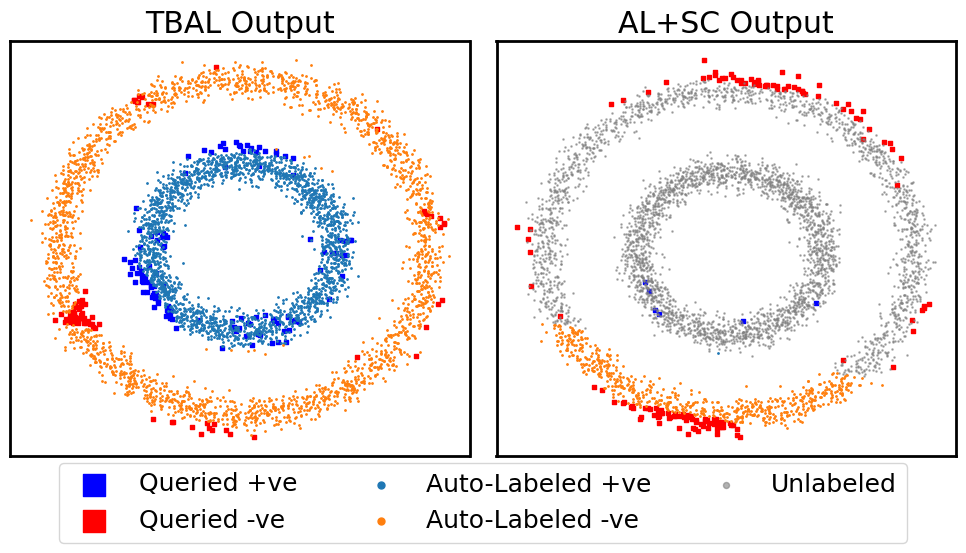

In [4]:

fig,ax = plt.subplots(1,2,figsize=(10,5))

L = vis_one_epoch_tbal(ax[0],act_lbl_out,r=0.6)
M= act_learn_out_vis(ax[1],act_lrn_out,r=0.6)
L.append(M[2])
legendEntries = ['Queried +ve ','Queried -ve','Auto-Labeled +ve','Auto-Labeled -ve','Unlabeled']

#POS_COLOR = colors(1)
#NEG_COLOR = colors(0)
#UNLBL_COLOR = cm.get_cmap('gray',200)(150)
ax[0].set_title('TBAL Output')
ax[1].set_title('AL+SC Output')
lgd=fig.legend(L,legendEntries,ncol=3,loc="lower center",bbox_to_anchor=(0.5, -0.12),
            borderaxespad=0, frameon=True, markerscale=5)

visualize = True 
save_path = f'{out_dir}/circles_fig_scatter.pdf'
plt.tight_layout()
plt.savefig(save_path,dpi=300, transparent=False,bbox_extra_artists=(lgd,), bbox_inches='tight')
if(not visualize):
    plt.close(fig)
